## Problem 5-5

Generate a $(log T, log \rho)$ chart of the transitions between different equation of state regions:

 - radiation dominated
 - ideal gas law
 - electron-degeneracy dominated: relativistic and non-relativistic 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import astropy.constants as const

# constants
# using solar elemental abundances X=0.7 Y=0.28 Z=0.02
#neutral gas
mu_n = 1/1.30 
#ionized gas
mu_i = 1/0.62
#hydrogen mass
m_H = 1.67372371e-27 * u.kg
k_B = const.k_B
#radiation density constant
a = 4*const.sigma_sb/const.c

#mean 2 nucloids per electron 
mu_e = 2



##### Ideal Gas / Radiation Transition

$$P_g = \frac{\rho}{\mu_i m_H}k_B T$$
$$P_{rad} = 1/3 a T^4$$

Radiation pressure and ideal gas pressure are equal (for a fully ionized gas) when $P_g = P_{rad}$ so
$$T = \left(\frac{3 k_B \rho}{\mu_i m_H a}\right)^{1/3}$$


In [25]:
# the (rho,T) line where ideal gas pressure and radiation pressure are equal
def P_g_equals_rad(rho):
    return (rho*3*k_B/mu_i/m_H/a)**(1/3)


##### Degeneracy Condition

$$\frac{T}{\rho^{2/3}} < \mathcal{D} = \frac{\hbar}{3m_e k_B} \left[ \frac{3 \pi^2}{m_H} \left(\frac{Z}{A}\right)\right]^{2/3} = 1261 K m^2 kg^{-2/3}$$

(Carroll, ch 15) 


In [29]:
#degeneracy condition constant
D = 1261 * u.K * u.m**2 * u.kg**(-2/3) 

# the (rho, T) line where gas becomes degenerate
def degeneracy_condition(rho):
    return D * rho**(2/3)



##### Relativistic / Non-Relativistic Transition

$$P_{e,n} = 1.004\times 10^{13} (\rho/\mu_e)^{5/3} dyne \cdot cm^{-2}$$
$$P_{e,r} = 1.243\times 10^{15} (\rho/\mu_e)^{4/3} dyne \cdot cm^{-2}$$

(Hansen)

So the transition from a non-relativistic to relativistic regime happens when $$\rho =\mu_e \left(\frac{124.3}{1.004} \right)^3$$

In [ ]:

# the density where degenerate gas becomes relativistic
rho_nonrel_rel = mu_e*(124.3/1.004)**3


Now generate the plot

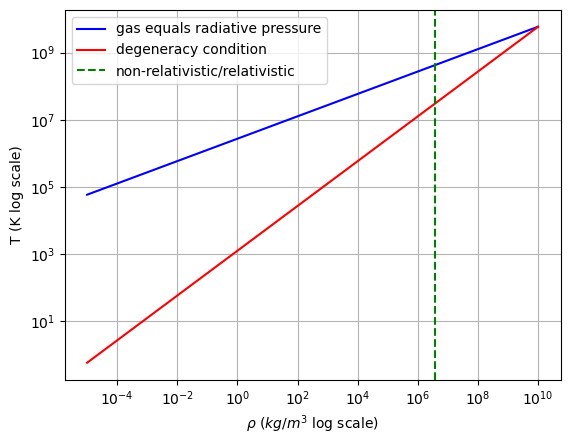

In [34]:

# Generate x values (must be positive for log scale)
rho = np.logspace(-5, 10, 1000) # Generates points spaced logarithmically

# Calculate y values
T_g_rad = P_g_equals_rad(rho)
T_degenerate = degeneracy_condition(rho)


# Create the log-log plot
plt.loglog(rho, T_g_rad, 'b-', label='gas equals radiative pressure') # 'b-' for blue line
plt.loglog(rho, T_degenerate, 'r-', label='degeneracy condition')
#plt.loglog(rho, T_g_en, 'g-', label='gas equals non-rel degenerate')
plt.axvline(rho_nonrel_rel, color='g', linestyle="--", label="non-relativistic/relativistic")

# Add labels and title
plt.xlabel('$\\rho$ ($kg/m^3$ log scale)')
plt.ylabel('T (K log scale)')
plt.title('')
plt.grid(True, which="both", ls="-", color='0.7') # Add grid for better readability
plt.legend() # Display the legend

# Show the plot
plt.show()



##### Now a $(log \rho, log P)$ plot

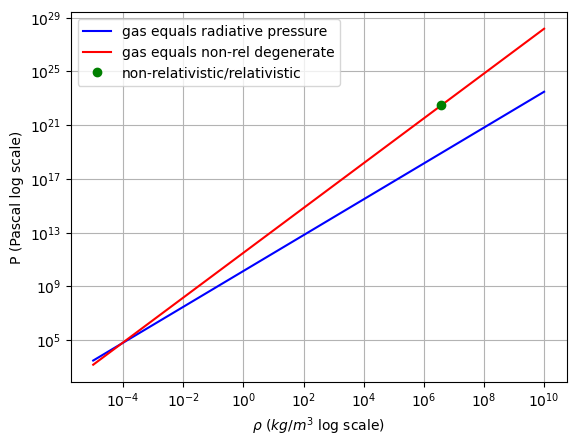

In [48]:
def P_rad(T):
    return 1/3*a*T**4
def P_g(mu,rho,T):
    return rho*k_B*T/mu/m_H
def P_en(rho):
    # formula is in dyne/cm^2, multiply by 0.1 to convert to SI
    return 1.004e13*(rho/mu_e)**(5/3)*(0.1)

# Calculate y values
P_g_rad = P_g(mu_i, rho, T_g_rad)
P_g_en = P_g(mu_n, rho, T_g_en)
P_nonrel_rel = P_en(rho_nonrel_rel)

#rho_degenerate = degeneracy_condition(rho)


# Create the log-log plot
plt.loglog(rho, P_g_rad, 'b-', label='gas equals radiative pressure') # 'b-' for blue line
plt.loglog(rho, P_g_en, 'r-', label='gas equals non-rel degenerate')
plt.plot(rho_nonrel_rel,P_nonrel_rel, 'go', label="non-relativistic/relativistic")

# Add labels and title
plt.xlabel('$\\rho$ ($kg/m^3$ log scale)')
plt.ylabel('P (Pascal log scale)')
plt.title('')
plt.grid(True, which="both", ls="-", color='0.7') # Add grid for better readability
plt.legend() # Display the legend

# Show the plot
plt.show()

